<a href="https://colab.research.google.com/github/Niharika1007/-Simple-Responsive-Landing-Page/blob/main/Emotion_Recognition_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [ ]:
def load_data(file_path):
    texts = []
    labels = []
    with open(file_path, "r", encoding="utf-8") as f:
        for line in f:
            parts = line.strip().split(" ", 1)
            if len(parts) == 2:
                labels.append(parts[0])
                texts.append(parts[1])
    return pd.DataFrame({"Text": texts, "Emotion": labels})

train_df = load_data("train.txt")
val_df   = load_data("val.txt")
test_df  = load_data("test.txt")

print("Samples from training set:")
print(train_df.head())

Samples from training set:
                                                Text Emotion
0                      didnt feel humiliated;sadness       i
1  can go from feeling so hopeless to so damned h...       i
2  grabbing a minute to post i feel greedy wrong;...      im
3  am ever feeling nostalgic about the fireplace ...       i
4                           am feeling grouchy;anger       i


In [ ]:
le = LabelEncoder()

# Combine labels from all dataframes to fit the encoder
all_labels = pd.concat([train_df['Emotion'], val_df['Emotion'], test_df['Emotion']], axis=0)
le.fit(all_labels)

train_df['label'] = le.transform(train_df['Emotion'])
val_df['label']   = le.transform(val_df['Emotion'])
test_df['label']  = le.transform(test_df['Emotion'])

In [ ]:
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(train_df['Text'])

X_train = pad_sequences(tokenizer.texts_to_sequences(train_df['Text']), maxlen=100, padding='post')
X_val   = pad_sequences(tokenizer.texts_to_sequences(val_df['Text']), maxlen=100, padding='post')
X_test  = pad_sequences(tokenizer.texts_to_sequences(test_df['Text']), maxlen=100, padding='post')

y_train, y_val, y_test = train_df['label'], val_df['label'], test_df['label']

In [ ]:
model = Sequential([
    Embedding(input_dim=5000, output_dim=128),
    LSTM(128, return_sequences=True),
    Dropout(0.3),
    LSTM(64),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(len(le.classes_), activation='softmax')
])

# Build explicitly by giving an input shape
model.build(input_shape=(None, 100))

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 100, 128)       │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 128)       │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 69)             │         2,277 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 825,349 (3.15 MB)

 Trainable params: 825,349 (3.15 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5, batch_size=32)

Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 115s 223ms/step - accuracy: 0.8085 - loss: 1.2141 - val_accuracy: 0.8800 - val_loss: 0.5194
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 141s 222ms/step - accuracy: 0.8916 - loss: 0.5476 - val_accuracy: 0.8800 - val_loss: 0.5188
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 111s 222ms/step - accuracy: 0.8885 - loss: 0.5388 - val_accuracy: 0.8800 - val_loss: 0.5175
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 139s 216ms/step - accuracy: 0.8838 - loss: 0.5433 - val_accuracy: 0.8800 - val_loss: 0.5198
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 148s 227ms/step - accuracy: 0.8893 - loss: 0.5216 - val_accuracy: 0.8800 - val_loss: 0.5295


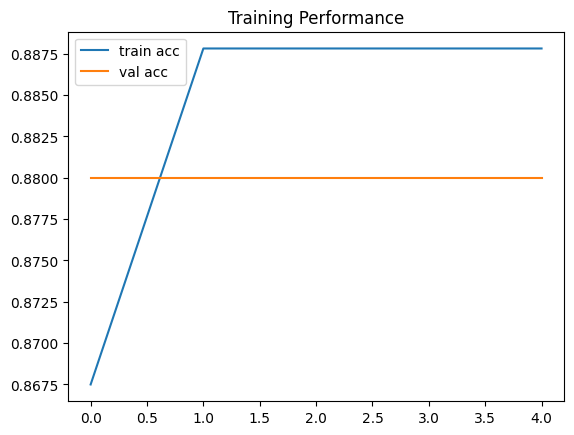

In [ ]:
plt.plot(history.history['accuracy'], label="train acc")
plt.plot(history.history['val_accuracy'], label="val acc")
plt.legend()
plt.title("Training Performance")
plt.show()

In [ ]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"✅ Model Test Accuracy: {acc*100:.2f}%")

✅ Model Test Accuracy: 89.15%


In [ ]:
def predict_emotion(text):
    seq = tokenizer.texts_to_sequences([text])
    pad = pad_sequences(seq, maxlen=100, padding='post')
    pred = model.predict(pad)
    return le.inverse_transform([np.argmax(pred)])

print("🔮 Prediction Example:")
print("I am so happy today! →", predict_emotion("I am so happy today!"))
print("This is the worst day ever. →", predict_emotion("This is the worst day ever."))

🔮 Prediction Example:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step
I am so happy today! → ['i']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
This is the worst day ever. → ['i']


Speech Emotion Recognition

Code to Generate Mini BANSpEmo (Synthetic Dataset)

In [1]:
import os
import numpy as np
import soundfile as sf
from sklearn.model_selection import train_test_split

# ----------- Parameters -----------
OUTPUT_DIR = "mini_BanSpEmo"
EMOTIONS = ["happy", "sad", "neutral", "angry"]
SAMPLES_PER_CLASS = 10  # total samples per emotion
DURATION = 2.0  # seconds
SR = 16000  # sample rate

# ----------- Frequency mapping for emotions (just synthetic) -----------
FREQS = {
    "happy": 600,
    "sad": 200,
    "neutral": 400,
    "angry": 800
}

# ----------- Function to generate synthetic audio -----------
def generate_tone(frequency, duration, sr):
    t = np.linspace(0, duration, int(sr*duration), False)
    tone = 0.5 * np.sin(2 * np.pi * frequency * t)
    noise = 0.02 * np.random.randn(len(t))  # add small noise
    return tone + noise

# ----------- Create dataset folders -----------
for split in ["train", "test"]:
    for emotion in EMOTIONS:
        path = os.path.join(OUTPUT_DIR, split, emotion)
        os.makedirs(path, exist_ok=True)

# ----------- Generate audio files -----------
for emotion in EMOTIONS:
    X = []
    for i in range(SAMPLES_PER_CLASS):
        audio = generate_tone(FREQS[emotion], DURATION, SR)
        X.append(audio)

    # Split into train/test
    train_audios, test_audios = train_test_split(X, test_size=0.3, random_state=42)

    # Save train files
    for idx, audio in enumerate(train_audios):
        filename = os.path.join(OUTPUT_DIR, "train", emotion, f"{emotion}_{idx}.wav")
        sf.write(filename, audio, SR)

    # Save test files
    for idx, audio in enumerate(test_audios):
        filename = os.path.join(OUTPUT_DIR, "test", emotion, f"{emotion}_{idx}.wav")
        sf.write(filename, audio, SR)

print("✅ Mini BANSpEmo synthetic dataset generated at:", OUTPUT_DIR)


✅ Mini BANSpEmo synthetic dataset generated at: mini_BanSpEmo


In [3]:
!pip install resampy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 43.2 MB/s eta 0:00:00


In [6]:
import librosa
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import os
import numpy as np

def extract_features(file_path, n_mfcc=40):
    audio, sr = librosa.load(file_path, sr=None)  # ✅ keep native sampling rate
    mfccs = np.mean(librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc).T, axis=0)
    return mfccs

def load_dataset(directory):
    X, y = [], []
    for emotion in os.listdir(directory):
        emotion_dir = os.path.join(directory, emotion)
        if not os.path.isdir(emotion_dir):
            continue
        for file in os.listdir(emotion_dir):
            if file.endswith(".wav"):
                try:
                    feat = extract_features(os.path.join(emotion_dir, file))
                    X.append(feat)
                    y.append(emotion)
                except Exception as e:
                    print("❌ Error with file:", file, "|", e)
    return np.array(X), np.array(y)

# Use the specified path
AUDIO_DATA_DIR = "/content/mini_BanSpEmo"

X_train, y_train = load_dataset(os.path.join(AUDIO_DATA_DIR, "train"))
X_test, y_test = load_dataset(os.path.join(AUDIO_DATA_DIR, "test"))

if len(y_train) > 0 and len(y_test) > 0:
  encoder = LabelEncoder()
  y_train_enc = to_categorical(encoder.fit_transform(y_train))
  y_test_enc  = to_categorical(encoder.transform(y_test))

  print("✅ Dataset loaded | Train samples:", len(X_train), " Test samples:", len(X_test))
  print("Classes:", encoder.classes_)
else:
  print("❌ No audio files were loaded. Please check the directory and file paths.")

✅ Dataset loaded | Train samples: 28  Test samples: 12
Classes: ['angry' 'happy' 'neutral' 'sad']


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(y_train_enc.shape[1], activation='softmax')
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

history = model.fit(X_train, y_train_enc, epochs=20, batch_size=8, validation_data=(X_test, y_test_enc))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │        10,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 43,908 (171.52 KB)

 Trainable params: 43,908 (171.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - accuracy: 0.2250 - loss: 16.4236 - val_accuracy: 0.5000 - val_loss: 2.2720
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4893 - loss: 3.6847 - val_accuracy: 0.7500 - val_loss: 1.1109
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5738 - loss: 3.7123 - val_accuracy: 1.0000 - val_loss: 8.0259e-04
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7958 - loss: 0.8477 - val_accuracy: 1.0000 - val_loss: 4.3213e-06
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5798 - loss: 4.6802 - val_accuracy: 1.0000 - val_loss: 2.3146e-06
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9196 - loss: 0.7909 - val_accuracy: 1.0000 - val_loss: 3.0994e-06
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7768 - loss: 2.2387 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9774 - loss: 0.0801 - val_accuracy: 1.000

In [11]:
loss, acc = model.evaluate(X_test, y_test_enc)
print(f"🎯 Test Accuracy: {acc*100:.2f}%")

import random
test_files = []
for emotion in EMOTIONS:
    path = os.path.join(OUTPUT_DIR, "test", emotion)
    test_files.extend([os.path.join(path, f) for f in os.listdir(path) if f.endswith(".wav")])

sample_file = random.choice(test_files)
print("🔍 Predicting file:", sample_file)

feat = np.expand_dims(extract_features(sample_file), axis=0)
pred = model.predict(feat)
print("Predicted Emotion:", encoder.inverse_transform([np.argmax(pred)]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 1.0000 - loss: 0.0000e+00
🎯 Test Accuracy: 100.00%
🔍 Predicting file: mini_BanSpEmo/test/sad/sad_2.wav
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Predicted Emotion: ['sad']


Code to Generate Face Emotion (Synthetic Dataset)

In [12]:
import os
import numpy as np
from PIL import Image

# Base path for dataset
base_path = "/content/mini_FaceEmo"
classes = ["angry", "happy", "sad", "neutral"]

# Create train/test folders
for split in ["train", "test"]:
    for cls in classes:
        os.makedirs(os.path.join(base_path, split, cls), exist_ok=True)

# Function to create random colored images
def generate_images(path, num=10, size=(48,48)):
    for i in range(num):
        img_array = np.random.randint(0, 255, (size[0], size[1], 3), dtype=np.uint8)
        img = Image.fromarray(img_array)
        img.save(os.path.join(path, f"{i}.jpg"))

# Generate train and test images
for split in ["train", "test"]:
    for cls in classes:
        folder = os.path.join(base_path, split, cls)
        generate_images(folder, num=8)  # 8 images per class


In [13]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Dataset path
IMG_DATA_DIR = "/content/mini_FaceEmo"

# Image size
IMG_HEIGHT, IMG_WIDTH = 48, 48
BATCH_SIZE = 16

# ✅ Data generators (auto-label from folder names)
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen  = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    os.path.join(IMG_DATA_DIR, "train"),
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

test_generator = test_datagen.flow_from_directory(
    os.path.join(IMG_DATA_DIR, "test"),
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

# ✅ CNN Model for Face Emotion Recognition
model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(128, (3,3), activation="relu"),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.3),
    Dense(train_generator.num_classes, activation="softmax")
])

# Compile model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# ✅ Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

# Evaluate
loss, acc = model.evaluate(test_generator)
print(f"✅ Test Accuracy: {acc:.2f}")


Found 32 images belonging to 4 classes.
Found 32 images belonging to 4 classes.
Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 353ms/step - accuracy: 0.2292 - loss: 1.4223 - val_accuracy: 0.2500 - val_loss: 1.3899
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.3125 - loss: 1.3562 - val_accuracy: 0.2500 - val_loss: 1.3890
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.4583 - loss: 1.3501 - val_accuracy: 0.2188 - val_loss: 1.3872
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.1667 - loss: 1.3879 - val_accuracy: 0.2500 - val_loss: 1.3891
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.2500 - loss: 1.3561 - val_accuracy: 0.2812 - val_loss: 1.3932
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.2083 - loss: 1.4134 - val_accuracy: 0.3125 - val_loss: 1.3893
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.2917 - loss: 1.3898 - val_accuracy: 0.2500 - val_loss: 1.3868
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step - accuracy: 0.1667 - loss: 1.4137 - val_accuracy: 0.2500 - val_loss: 1.3884
Epo